In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [7]:
demographics = pd.read_csv('../../Dataset/Demographics/demographics.csv')
sensing = pd.read_csv('../../Dataset/Sensing/sensingdata.csv')

In [47]:
#format columns (day and day of week)

sensing['formatted_day'] = pd.to_datetime(sensing['day'].astype(str), format='%Y%m%d')
sensing['day_of_week'] = sensing['formatted_day'].dt.day_name()

#merge sensing and demo
data = sensing.merge(demographics[['uid', 'gender', 'race']], on= 'uid', how='left')
print(data.columns.tolist())


['uid', 'is_ios', 'day', 'act_in_vehicle_ep_0', 'act_in_vehicle_ep_1', 'act_in_vehicle_ep_2', 'act_in_vehicle_ep_3', 'act_in_vehicle_hr_0', 'act_in_vehicle_hr_1', 'act_in_vehicle_hr_10', 'act_in_vehicle_hr_11', 'act_in_vehicle_hr_12', 'act_in_vehicle_hr_13', 'act_in_vehicle_hr_14', 'act_in_vehicle_hr_15', 'act_in_vehicle_hr_16', 'act_in_vehicle_hr_17', 'act_in_vehicle_hr_18', 'act_in_vehicle_hr_19', 'act_in_vehicle_hr_2', 'act_in_vehicle_hr_20', 'act_in_vehicle_hr_21', 'act_in_vehicle_hr_22', 'act_in_vehicle_hr_23', 'act_in_vehicle_hr_3', 'act_in_vehicle_hr_4', 'act_in_vehicle_hr_5', 'act_in_vehicle_hr_6', 'act_in_vehicle_hr_7', 'act_in_vehicle_hr_8', 'act_in_vehicle_hr_9', 'act_on_bike_ep_0', 'act_on_bike_ep_1', 'act_on_bike_ep_2', 'act_on_bike_ep_3', 'act_on_bike_hr_0', 'act_on_bike_hr_1', 'act_on_bike_hr_10', 'act_on_bike_hr_11', 'act_on_bike_hr_12', 'act_on_bike_hr_13', 'act_on_bike_hr_14', 'act_on_bike_hr_15', 'act_on_bike_hr_16', 'act_on_bike_hr_17', 'act_on_bike_hr_18', 'act_on_

In [45]:
#duration of sleep by days of week
sleepDur = data.groupby('day_of_week')['sleep_duration'].sum()
sleepDur = sleepDur.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                              'Friday', 'Saturday', 'Sunday'])
print("Sleep Duration by days of week")
display(sleepDur)

Sleep Duration by days of week


day_of_week
Monday       228992.625
Tuesday      231493.500
Wednesday    230531.000
Thursday     228078.875
Friday       226432.250
Saturday     232792.125
Sunday       235249.500
Name: sleep_duration, dtype: float64

Sleep Duration by days of week
day_of_week
Monday       228992.625
Tuesday      231493.500
Wednesday    230531.000
Thursday     228078.875
Friday       226432.250
Saturday     232792.125
Sunday       235249.500
Name: sleep_duration, dtype: float64


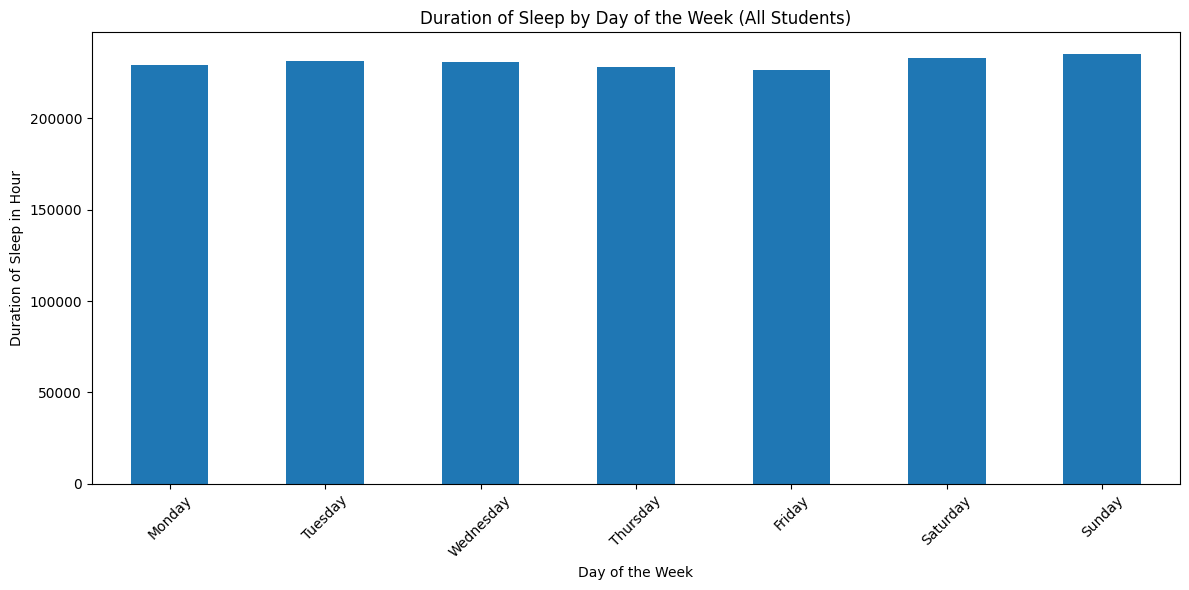

In [17]:
#chart
plt.figure(figsize=(12, 6))
sleepDur.plot(kind='bar')
plt.title('Duration of Sleep by Day of the Week (All Students)')
plt.xlabel('Day of the Week')
plt.ylabel('Duration of Sleep in Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
#male vs female
sleep_by_day_gender = data.groupby(['day_of_week', 'gender'])['sleep_duration'].sum().unstack()
#reindex by day of week for readability
sleep_by_day_gender = sleep_by_day_gender.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                              'Friday', 'Saturday', 'Sunday'])

print('Sleep duration')
display(sleep_by_day_gender)


Sleep duration


gender,F,M,both
day_of_week,,,
Monday,160598.875,65856.000,1223.000
Tuesday,162173.875,66829.625,1159.000
Wednesday,161248.750,66780.500,1180.000
Thursday,159653.500,65772.125,1238.500
Friday,158570.750,65353.250,1218.000
Saturday,162472.875,67816.125,1226.375
Sunday,164727.125,67991.375,1215.000


<Figure size 3000x600 with 0 Axes>

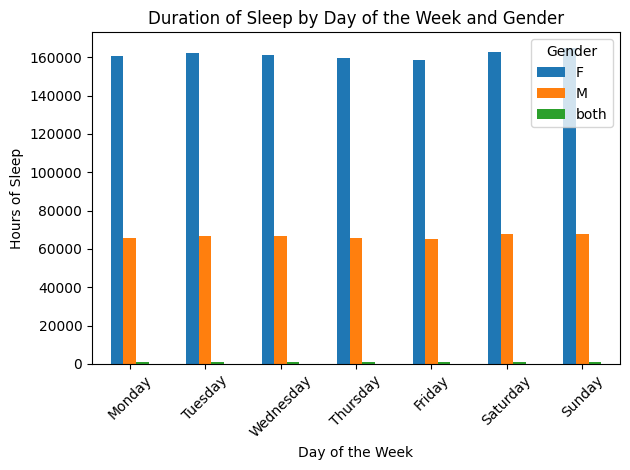

In [24]:

plt.figure(figsize=(30, 6))
sleep_by_day_gender.plot(kind='bar')
plt.title('Duration of Sleep by Day of the Week and Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Hours of Sleep')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
#sort by race.
sleep_by_day_race = data.groupby(['day_of_week', 'race'])['sleep_duration'].sum().unstack()
#reindex by day of week for readability
sleep_by_day_race = sleep_by_day_race.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                              'Friday', 'Saturday', 'Sunday'])
display(sleep_by_day_race)

race,alaskan native/white,american indian/alaska native,american indian/white,asian,black,more than one,other/hispanic,white
day_of_week,,,,,,,,
Monday,1321.00,1174.500,1110.00,53027.250,8508.375,10479.75,8703.500,143353.500
Tuesday,1363.00,1154.000,1130.00,54011.125,8579.000,10626.25,8848.875,144450.250
Wednesday,1290.75,1122.500,1055.50,54068.000,8768.875,10550.50,8904.625,143448.500
Thursday,1389.75,1206.625,1089.00,53547.500,8552.125,10584.25,8665.000,141629.875
Friday,1327.75,1158.375,1115.50,53217.250,8578.625,10478.00,8466.000,140800.500
Saturday,1262.00,1192.000,1174.25,55666.250,9050.500,10760.75,9060.875,143348.750
Sunday,1306.50,1185.375,1234.25,55998.125,9057.000,10665.50,9189.625,145297.125


<Figure size 2000x800 with 0 Axes>

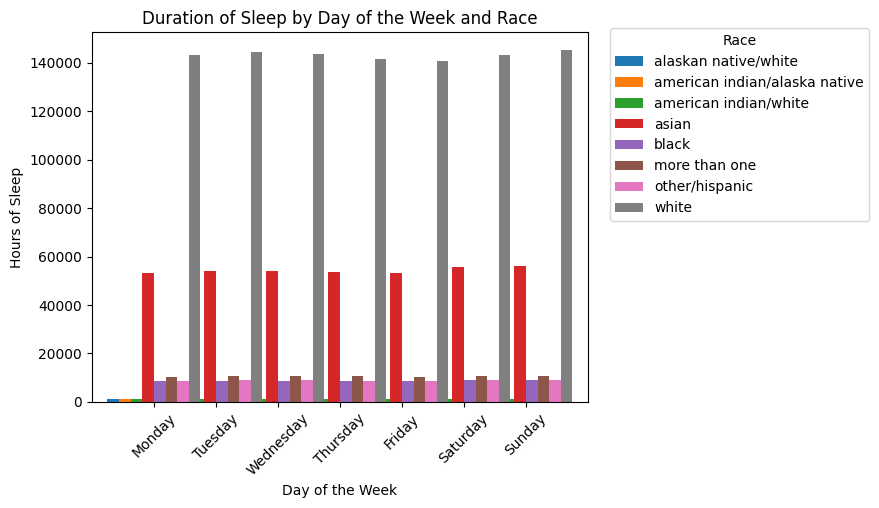

In [43]:
#display barchart

plt.figure(figsize=(20, 8))
sleep_by_day_race.plot(kind='bar', width= 1.5)
plt.title('Duration of Sleep by Day of the Week and Race')
plt.xlabel('Day of the Week')
plt.ylabel('Hours of Sleep')
plt.legend(title='Race', bbox_to_anchor=(1.03, 1.03), loc='upper left')
plt.xticks(rotation=45)
plt.show()
